# 📊 MiniLab – Análise Estatística

**Projeto:** Análise de clientes de um banco de cartões de crédito com foco em comportamento e cancelamento (churn).  
**Objetivo:** Aplicar técnicas estatísticas para identificar padrões e possíveis fatores associados ao cancelamento de clientes, utilizando um conjunto de dados realista e relevante.

**Base de Dados:**  
Dataset com informações de mais de 10.000 clientes, incluindo dados demográficos, comportamentais e de consumo. A base foi extraída da plataforma Kaggle, originalmente publicada no desafio ["Credit Card Customers"](https://www.kaggle.com/sakshigoyal7/credit-card-customers).

---

## 🧭 Estrutura do Notebook

### 🔹 Etapa 1 – Análise Exploratória: Frequência e Estatística Descritiva

- Tabelas de frequência absoluta, relativa e acumulada  
- Distribuição de variáveis categóricas e numéricas  
- Medidas de tendência central e dispersão  
- Visualizações: gráficos de barras, histogramas e boxplots  
- Interpretação descritiva com foco em comportamento e padrões  

### 🔹 Etapa 2 – Inferência Estatística Aplicada

- Formulação de hipóteses com base no problema de churn  
- Testes estatísticos apropriados (comparação de grupos, associação entre variáveis)  
- Avaliação de significância e interpretação prática dos resultados  
- Geração de insights aplicáveis ao contexto de retenção de clientes  

---


## 🔹 Etapa 1 – Análise Exploratória: Frequência e Estatística Descritiva

### 1. Carregamento e Prévia da Base

Esta seção tem como objetivo preparar o ambiente de análise com a importação das bibliotecas essenciais e o carregamento inicial da base de dados. Também inclui uma pré-visualização dos dados, permitindo compreender sua estrutura geral e identificar possíveis necessidades de tratamento ou limpeza futura.

---

#### 📚 1.1 – Importação das Bibliotecas

Importação das bibliotecas fundamentais para a análise estatística, visualização e manipulação de dados:

- `pandas` e `numpy` para manipulação de dados e cálculos numéricos;
- `math` e `scipy.stats` para operações matemáticas e testes estatísticos;
- `pathlib` para facilitar a gestão de caminhos relativos no projeto;
- `matplotlib.pyplot` e `seaborn` para criação de visualizações.

Também são definidas configurações visuais básicas para os gráficos com o objetivo de manter a apresentação consistente ao longo do notebook.

In [1]:
# 📦 Imports principais
import math
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.stats import ttest_ind

# 📈 Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# ⚙️ Configurações de visualização
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

#### 📦 1.2 – Carregamento do Dataset

Leitura do arquivo `ClientesBanco.csv`, que contém informações de mais de 10.000 clientes de uma empresa de cartão de crédito.  
O conjunto de dados inclui atributos demográficos, comportamentais e financeiros, com foco em análises relacionadas ao cancelamento de clientes (churn).

O uso da biblioteca `pathlib` garante maior flexibilidade no acesso ao arquivo, promovendo compatibilidade com diferentes sistemas de diretório.

In [2]:
# 📂 Definição do diretório base do projeto
base_dir = Path().resolve().parent  # Caminho até a pasta principal do projeto

# 📁 Caminho completo até o arquivo CSV de entrada
input_csv = base_dir / 'data/ClientesBanco.csv'

# 📄 Leitura do dataset
df = pd.read_csv(input_csv, encoding='latin1')

#### 👁️‍🗨️ 1.3 – Prévia da Base de Dados

A seguir, é realizada uma inspeção inicial da estrutura do dataset, seguindo uma ordem progressiva de leitura e compreensão dos dados:

- `df.shape`: exibe a dimensão da base (número de linhas e colunas);
- `df.columns`: lista os nomes de todas as colunas disponíveis;
- `df.head()`: apresenta as primeiras linhas da base para observar os valores iniciais;
- `df.info()`: resume os tipos de dados, a quantidade de valores não nulos e o uso de memória;
- `df.describe()`: fornece estatísticas descritivas básicas para as variáveis numéricas.

Essa sequência facilita o entendimento gradual da estrutura dos dados antes de avançar para etapas mais específicas da análise.

In [3]:
# 🔍 Dimensões do dataset (linhas, colunas)
df.shape

(10127, 21)

In [4]:
# 🏷️ Lista de colunas disponíveis
df.columns

Index(['CLIENTNUM', 'Categoria', 'Idade', 'Sexo', 'Dependentes', 'Educação',
       'Estado Civil', 'Faixa Salarial Anual', 'Categoria Cartão',
       'Meses como Cliente', 'Produtos Contratados', 'Inatividade 12m',
       'Contatos 12m', 'Limite', 'Limite Consumido', 'Limite Disponível',
       'Mudanças Transacoes_Q4_Q1', 'Valor Transacoes 12m',
       'Qtde Transacoes 12m', 'Mudança Qtde Transações_Q4_Q1',
       'Taxa de Utilização Cartão'],
      dtype='object')

In [5]:
# 👀 Visualização das primeiras linhas do dataset
df.head()

,CLIENTNUM,Categoria,Idade,Sexo,Dependentes,Educação,Estado Civil,Faixa Salarial Anual,Categoria Cartão,Meses como Cliente,...,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
0,768805383,Cliente,45,M,3,Ensino Médio,Casado,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1335.0,1144,42,1625.0,0.061
1,818770008,Cliente,49,F,5,Ensino Superior,Solteiro,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1541.0,1291,33,3714.0,0.105
2,713982108,Cliente,51,M,3,Ensino Superior,Casado,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2594.0,1887,20,2333.0,0.000
3,769911858,Cliente,40,F,4,Ensino Médio,Não informado,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1405.0,1171,20,2333.0,0.760
4,709106358,Cliente,40,M,3,Sem ensino formal,Casado,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2175.0,816,28,2.5,0.000


In [6]:
# ℹ️ Informações gerais sobre os tipos de dados e valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CLIENTNUM                      10127 non-null  int64  
 1   Categoria                      10127 non-null  object 
 2   Idade                          10127 non-null  int64  
 3   Sexo                           10127 non-null  object 
 4   Dependentes                    10127 non-null  int64  
 5   Educação                       10127 non-null  object 
 6   Estado Civil                   10127 non-null  object 
 7   Faixa Salarial Anual           10127 non-null  object 
 8   Categoria Cartão               10126 non-null  object 
 9   Meses como Cliente             10127 non-null  int64  
 10  Produtos Contratados           10127 non-null  int64  
 11  Inatividade 12m                10127 non-null  int64  
 12  Contatos 12m                   10127 non-null 

In [7]:
# 📌 Resumo estatístico geral do dataset
df.describe()

,CLIENTNUM,Idade,Dependentes,Meses como Cliente,Produtos Contratados,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,108.817273,4404.086304,64.858695,66.573618,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,354.050357,3397.129254,23.472570,283.988065,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3397.000000,18484.000000,139.000000,3714.000000,0.999000


### 1.2. Análise de Frequência de Variáveis Categóricas

Esta etapa tem como objetivo identificar a distribuição das variáveis categóricas do dataset, avaliando como as categorias se distribuem em termos absolutos, relativos e acumulados. Também serão utilizadas visualizações gráficas para facilitar a interpretação.

A análise de frequência é fundamental para compreender a composição dos dados e detectar possíveis desequilíbrios, padrões ou tendências relevantes.

---

#### 🎯 1.2.1 - Distribuição da variável: Categoria

A variável `Categoria` representa o status do cliente em relação ao cancelamento do cartão.  
Os valores possíveis são:

- `"Cliente"`: cliente ativo;
- `"Cancelado"`: cliente que encerrou o contrato com a empresa.

Essa é a variável-alvo da análise e será usada posteriormente na formulação das hipóteses estatísticas.
A seguir, é apresentada a distribuição de frequência absoluta, relativa e acumulada.


In [8]:
# Tabela de frequência da variável 'Categoria'
cat_freq = df['Categoria'].value_counts().sort_index().to_frame(name='fi')

# Frequência relativa (proporção de cada categoria)
cat_freq['fr'] = (cat_freq['fi'] / cat_freq['fi'].sum()).round(4)

# Frequência acumulada (quantidade)
cat_freq['fac'] = cat_freq['fi'].cumsum()

# Frequência relativa em percentual (com %)
cat_freq['fr(%)'] = (cat_freq['fr'] * 100).round(2).astype(str) + '%'

# Frequência acumulada em percentual
cat_freq['fac(%)'] = (cat_freq['fac'] / cat_freq['fi'].sum() * 100).round(2).astype(str) + '%'

# Exibição final da tabela
cat_freq.reset_index().rename(columns={'index': 'Categoria'})

,Categoria,fi,fr,fac,fr(%),fac(%)
0,Cancelado,1627,0.1607,1627,16.07%,16.07%
1,Cliente,8500,0.8393,10127,83.93%,100.0%


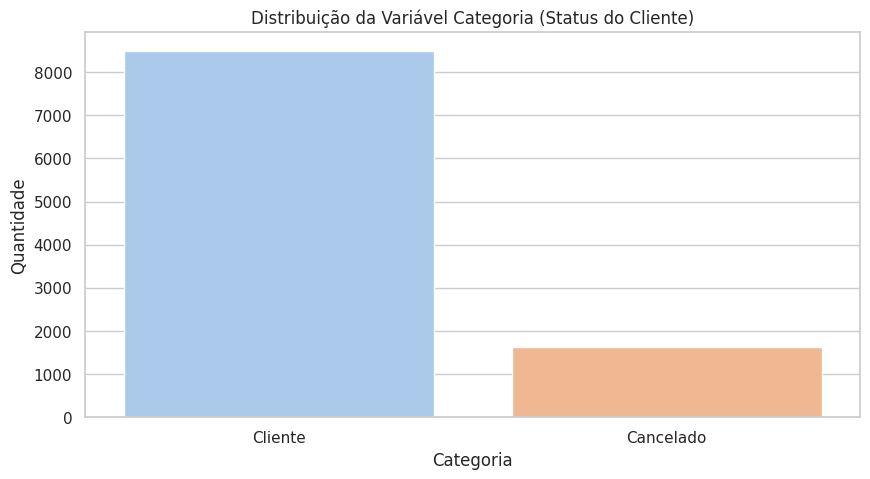

In [9]:
# Gráfico da distribuição da variável 'Categoria'
sns.countplot(x='Categoria', hue='Categoria', data=df, palette='pastel', legend=False)
plt.title('Distribuição da Variável Categoria (Status do Cliente)')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.show()

#### 📊 1.2.2 - Distribuição da variável: Sexo

A variável `Sexo` representa o gênero do cliente.  
Essa informação pode estar associada a padrões de consumo ou cancelamento e será investigada posteriormente em análises cruzadas com a variável alvo (`Categoria`).

A seguir, é apresentada a distribuição de frequência absoluta, relativa e acumulada para essa variável.


In [10]:
# Tabela de frequência da variável 'Sexo'
sexo_freq = df['Sexo'].value_counts().sort_index().to_frame(name='fi')

# Frequência relativa (proporção de cada categoria)
sexo_freq['fr'] = (sexo_freq['fi'] / sexo_freq['fi'].sum()).round(4)

# Frequência acumulada (quantidade)
sexo_freq['fac'] = sexo_freq['fi'].cumsum()

# Frequência relativa em percentual (com %)
sexo_freq['fr(%)'] = (sexo_freq['fr'] * 100).round(2).astype(str) + '%'

# Frequência acumulada em percentual
sexo_freq['fac(%)'] = (sexo_freq['fac'] / sexo_freq['fi'].sum() * 100).round(2).astype(str) + '%'

# Exibição final da tabela
sexo_freq.reset_index().rename(columns={'index': 'Sexo'})

,Sexo,fi,fr,fac,fr(%),fac(%)
0,F,5358,0.5291,5358,52.91%,52.91%
1,M,4769,0.4709,10127,47.09%,100.0%


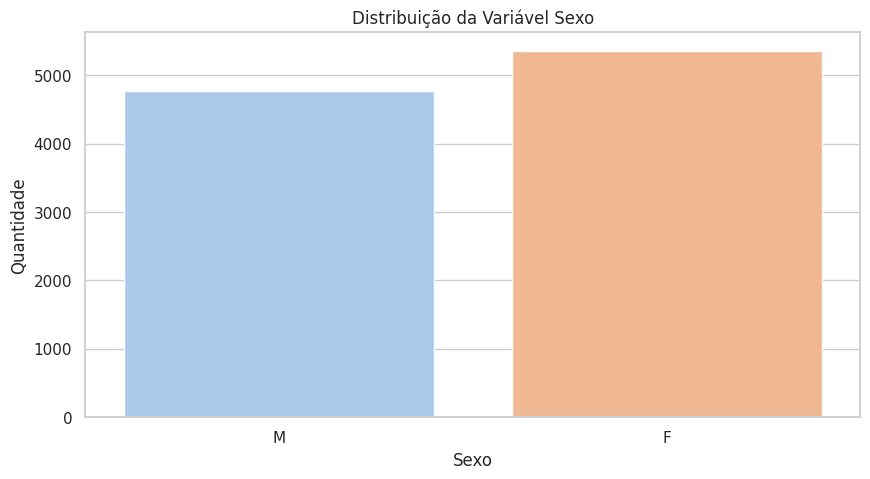

In [11]:
# Gráfico da distribuição da variável 'Sexo'
sns.countplot(x='Sexo', hue='Sexo', data=df, palette='pastel', legend=False)
plt.title('Distribuição da Variável Sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.show()

#### 🎓 1.2.3 - Distribuição da variável: Educação

A variável `Educação` representa o nível educacional informado pelo cliente no momento do cadastro.  
Essa informação pode refletir diferentes padrões de uso, perfil de consumo e até propensão ao cancelamento.

A seguir, será analisada a distribuição de frequência absoluta, relativa e acumulada.

In [12]:
# Tabela de frequência da variável 'Educação'
edu_freq = df['Educação'].value_counts().sort_index().to_frame(name='fi')

# Frequencia relativa (proporção de cada categoria)
edu_freq['fr'] = (edu_freq['fi'] / edu_freq['fi'].sum()).round(4)

#Frequencia acumulada(quantidade)
edu_freq['fac'] = edu_freq['fi'].cumsum()

# Frequencia relativa em percentual (com %)
edu_freq['fr(%)'] = (edu_freq['fr'] * 100).round(2).astype(str) + '%'

# Frequencia acumulada em percentual
edu_freq['fac(%)'] =  (edu_freq['fac'] / edu_freq['fi'].sum() *100).round(2).astype(str) + '%'

# Exibição final da tabela
edu_freq.reset_index().rename(columns={'index': 'Edudação'})

,Educação,fi,fr,fac,fr(%),fac(%)
0,Doutorado,451,0.0445,451,4.45%,4.45%
1,Ensino Médio,2013,0.1988,2464,19.88%,24.33%
2,Ensino Superior,3128,0.3089,5592,30.89%,55.22%
3,Ensino Superior Incompleto,1013,0.1000,6605,10.0%,65.22%
4,Não informado,1519,0.1500,8124,15.0%,80.22%
5,Post-Ensino Superior,516,0.0510,8640,5.1%,85.32%
6,Sem ensino formal,1487,0.1468,10127,14.68%,100.0%


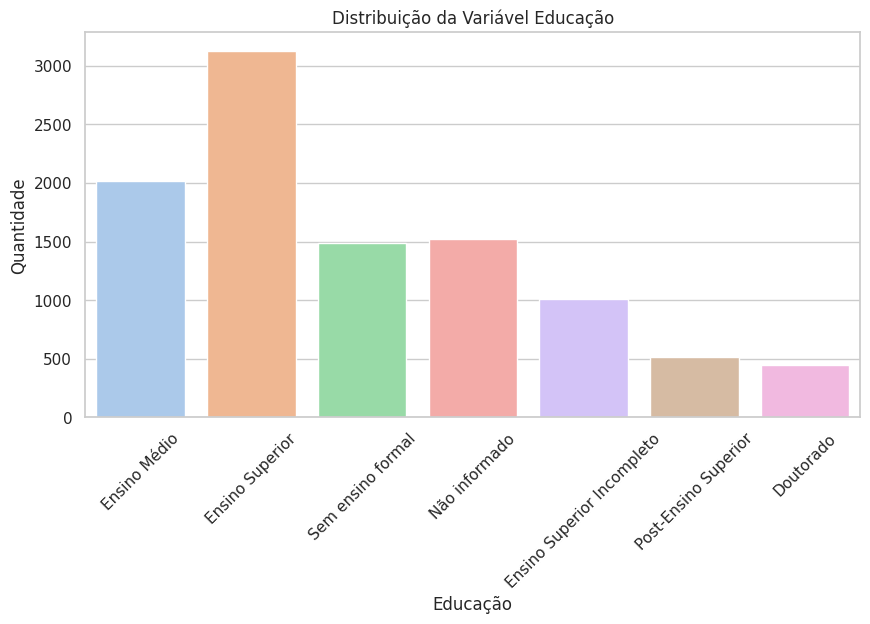

In [13]:
# Grafico da distribuição da variável ' Educação'
sns.countplot(x='Educação', hue='Educação', data=df, palette='pastel', legend=False)
plt.title('Distribuição da Variável Educação')
plt.xlabel('Educação')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)  
plt.show()

#### 💍 1.2.4 - Distribuição da variável: Estado Civil

A variável `Estado Civil` representa a condição civil do cliente.  
Esse tipo de dado pode indicar características de perfil, como estabilidade financeira, dependentes, entre outros.

A distribuição de frequência será avaliada a seguir.


In [14]:
# Tabela de frequência da variável 'Estado Civil'
civil_freq = df['Estado Civil'].value_counts().sort_index().to_frame(name='fi')

# Frequência relativa (proporção de cada categoria)
civil_freq['fr'] = (civil_freq['fi'] / civil_freq['fi'].sum()).round(4)

# Frequência acumulada (quantidade)
civil_freq['fac'] = civil_freq['fi'].cumsum()

# Frequência relativa em percentual (com %)
civil_freq['fr(%)'] = (civil_freq['fr'] * 100).round(2).astype(str) + '%'

#Frequência acumulada em percentual
civil_freq['fac(%)'] = (civil_freq['fac'] / civil_freq['fi'].sum() *100).round(2).astype(str) + '%'

# Exibição final da tabela
civil_freq.reset_index().rename(columns={'index': 'Estado Civil'})

,Estado Civil,fi,fr,fac,fr(%),fac(%)
0,Casado,4687,0.4628,4687,46.28%,46.28%
1,Divorciado,748,0.0739,5435,7.39%,53.67%
2,Não informado,749,0.0740,6184,7.4%,61.06%
3,Solteiro,3943,0.3894,10127,38.94%,100.0%


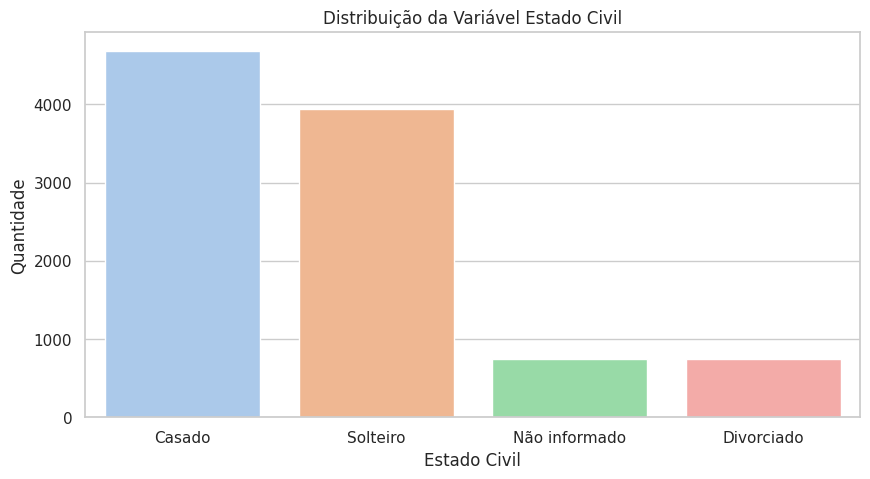

In [15]:
# Grafico de distribuição da Variaável ' Estado Civil'
sns.countplot(x='Estado Civil', hue='Estado Civil', data=df, palette= 'pastel', legend=False)
plt.title('Distribuição da Variável Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Quantidade')
plt.show()

#### 💰 1.2.5 - Distribuição da variável: Faixa Salarial Anual

A variável `Faixa Salarial Anual` informa a estimativa de renda anual do cliente.  
Trata-se de uma variável relevante para análises de poder de compra, limite de crédito e potencial risco de cancelamento.

A seguir, será exibida a distribuição de frequência dessa variável categórica.

In [16]:
# Tabela de frequência da variável 'Faixa Salarial Anual'
fsa_freq = df['Faixa Salarial Anual'].value_counts().sort_index().to_frame(name='fi')

# Frequência relativa (proporção de cada categoria)
fsa_freq['fr'] = (fsa_freq['fi'] / fsa_freq['fi'].sum()).round(4)

# Frequência acumulada (quantidade)
fsa_freq['fac'] = fsa_freq['fi'].cumsum()

# Frequência relativa em percentual (com %)
fsa_freq['fr(%)'] = (fsa_freq['fr'] * 100).round(2).astype(str) + '%'

# Frequência acumulada em percentual
fsa_freq['fac(%)'] = (fsa_freq['fac'] / fsa_freq['fi'].sum() *100).round(2).astype(str) + '%'

# Exibição final da tabela
fsa_freq.reset_index().rename(columns={'index':'Faixa Salarial Anual'})

,Faixa Salarial Anual,fi,fr,fac,fr(%),fac(%)
0,$120K +,727,0.0718,727,7.18%,7.18%
1,$40K - $60K,1790,0.1768,2517,17.68%,24.85%
2,$60K - $80K,1402,0.1384,3919,13.84%,38.7%
3,$80K - $120K,1535,0.1516,5454,15.16%,53.86%
4,Less than $40K,3561,0.3516,9015,35.16%,89.02%
5,Não informado,1112,0.1098,10127,10.98%,100.0%


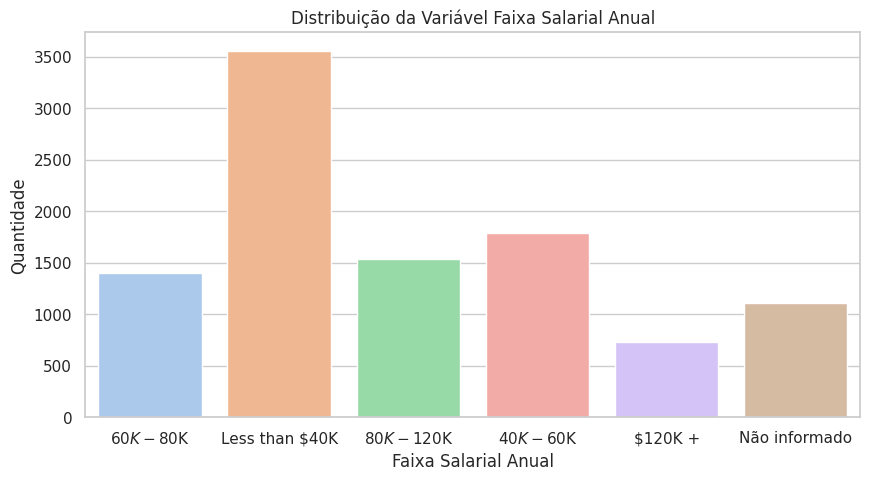

In [17]:
# Gráfico da distribuição da variável 'Faixa Salarial Anual'
sns.countplot(x='Faixa Salarial Anual', hue='Faixa Salarial Anual', data=df, palette='pastel', legend=False)
plt.title('Distribuição da Variável Faixa Salarial Anual')
plt.xlabel('Faixa Salarial Anual')
plt.ylabel('Quantidade')
plt.show()

#### 💳 1.2.6 - Distribuição da variável: Categoria Cartão

A variável `Categoria Cartão` representa o tipo de cartão de crédito associado ao cliente (ex: Blue, Silver, Gold, Platinum).  
É uma variável que pode estar relacionada ao comportamento de consumo e à experiência do cliente com a empresa.

A análise de frequência será apresentada a seguir.


In [18]:
# Tabela de frequência da variável 'Categoria Cartão'
card_freq = df['Categoria Cartão'].value_counts().sort_index().to_frame(name='fi')

# Frequência relativa (proporção de cada categoria)
card_freq['fr'] = (card_freq['fi'] / card_freq['fi'].sum()).round(4)

# Frequência acumulada (quantidade)
card_freq['fac'] = card_freq['fi'].cumsum()

# Frequência relativa em percentual (com %)
card_freq['fr(%)'] = (card_freq['fr'] * 100).round(2).astype(str) + '%'

# Frequência acumulada em percentual
card_freq['fac(%)'] = (card_freq['fac'] / card_freq['fi'].sum() *100).round(2).astype(str) + '%'

# Exibição final da tabela
card_freq.reset_index().rename(columns={'index':'Categoria Cartão'})

,Categoria Cartão,fi,fr,fac,fr(%),fac(%)
0,Blue,9435,0.9318,9435,93.18%,93.18%
1,Gold,116,0.0115,9551,1.15%,94.32%
2,Platinum,20,0.0020,9571,0.2%,94.52%
3,Silver,555,0.0548,10126,5.48%,100.0%


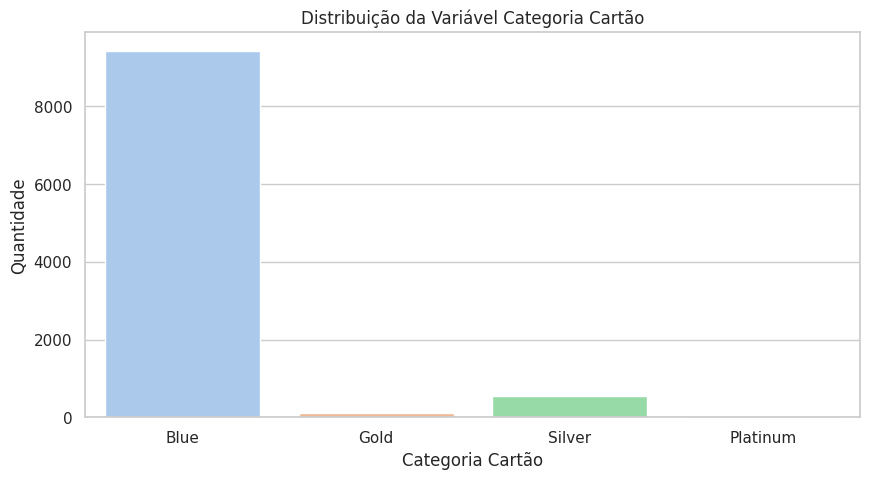

In [19]:
# Gráfico da distribuição da variável 'Categoria Cartão'
sns.countplot(x='Categoria Cartão', hue='Categoria Cartão', data=df, palette='pastel', legend=False)
plt.title('Distribuição da Variável Categoria Cartão')
plt.xlabel('Categoria Cartão')
plt.ylabel('Quantidade')
plt.show()

#### ✅ Conclusão da análise das variáveis categóricas

A análise de frequência e distribuição das variáveis categóricas permitiu observar padrões relevantes no perfil dos clientes da base:

- **Sexo**: A maioria dos clientes é do sexo feminino, representando **52,91%** do total.
- **Educação**: A categoria predominante é **ensino superior**, com **30,89%** dos registros. A menor representatividade é observada na categoria **doutorado**, com apenas **4,45%**.
- **Estado Civil**: A maior parte dos clientes é **casado** (**46,28%**), seguida pelos **solteiros** (**38,94%**).
- **Categoria do Cartão**: A concentração está fortemente voltada para a categoria **Blue**, que representa **93,18%** dos clientes. A categoria com menor incidência é a **Platinum**, com apenas **0,20%**.

Essas distribuições fornecem uma visão preliminar importante sobre o perfil demográfico e comportamental dos clientes, o que pode contribuir na identificação de possíveis padrões associados ao cancelamento do cartão.  
A próxima etapa consiste na análise das **variáveis numéricas**, com foco em medidas de tendência central, dispersão e distribuição.

### 1.3 – Análise Estatística: Variáveis Numéricas

Nesta seção, exploramos as variáveis numéricas do dataset por meio de estatísticas descritivas e visualizações gráficas.  
O objetivo é compreender a distribuição, tendência central e dispersão dos dados, além de identificar possíveis outliers e padrões relevantes.

A análise será dividida em três partes principais:

- **1.3.1 – Tabela Descritiva Padrão:** visão geral das principais métricas utilizando funções nativas.
- **1.3.2 – Estatísticas com Função Personalizada:** cálculo de medidas complementares com maior controle sobre o formato da saída.
- **1.3.3 – Visualização Gráfica:** uso de histogramas e boxplots para análise visual das distribuições.

---

#### 1.3.1 - Tabela Descritiva das Variáveis Numéricas

Esta seção apresenta a descrição estatística das variáveis numéricas do dataset. As medidas fornecem uma visão geral sobre a distribuição dos dados, incluindo:

- **Média**: tendência central.
- **Mediana**: ponto central que divide a amostra.
- **Moda**: valor mais frequente.
- **Mínimo e Máximo**: amplitude dos dados.
- **Desvio Padrão**: dispersão em torno da média.
- **Coeficiente de Variação**: grau relativo de dispersão dos dados.

Essas métricas são fundamentais para compreender o comportamento geral das variáveis e identificar possíveis distorções causadas por valores extremos.


In [20]:
# Criação da lista definitiva de variáveis numéricas
num_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_vars.remove('CLIENTNUM')  # Remover o identificador

# Pré-visualização
df[num_vars].head()

,Idade,Dependentes,Meses como Cliente,Produtos Contratados,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
0,45,3,39,5,1,3,12691.0,777,11914.0,1335.0,1144,42,1625.0,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1541.0,1291,33,3714.0,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2594.0,1887,20,2333.0,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1405.0,1171,20,2333.0,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2175.0,816,28,2.5,0.000


#### 1.3.2 - Estatística Descritiva das Variáveis Numéricas

Nesta etapa, serão calculadas estatísticas descritivas para as variáveis numéricas do conjunto de dados. O objetivo é compreender a distribuição, dispersão e possíveis padrões entre os dados quantitativos, identificando possíveis outliers e variáveis com alta ou baixa variabilidade.

As métricas analisadas serão:
- **Média**
- **Mediana**
- **Moda**
- **Desvio padrão**
- **Mínimo e Máximo**
- **Coeficiente de Variação** (CV = desvio padrão / média)


##### 📊 Por que usar uma função personalizada de estatísticas?

O método `df.describe()` é útil para obter rapidamente algumas estatísticas descritivas básicas, como média, desvio padrão, mínimo, máximo e quartis. No entanto, ele não inclui métricas importantes como:

- **Mediana**: mais robusta que a média quando há outliers.
- **Moda**: útil para detectar repetições e padrões.
- **Coeficiente de Variação (CV)**: permite comparar a dispersão entre variáveis com escalas diferentes.

Além disso, a função `describe()` não permite personalizar a ordem, formato e nomenclatura das métricas, o que pode comprometer a legibilidade da análise. Por isso, neste Minilab foi utilizada uma função customizada que amplia o conjunto de estatísticas e melhora a apresentação dos dados, promovendo uma análise mais completa e didática.


In [21]:
# Função para calcular estatísticas descritivas estendidas
def estatisticas_numericas(df, colunas):
    desc = df[colunas].describe().T
    desc['mediana'] = df[colunas].median()
    desc['moda'] = df[colunas].mode().iloc[0]
    desc['coef_var'] = (df[colunas].std() / df[colunas].mean()).round(4)
    return desc[['count', 'mean', 'mediana', 'moda', 'std', 'coef_var', 'min', '25%', '50%', '75%', 'max']]

# Aplicação da função nas variáveis numéricas
df_estatisticas = estatisticas_numericas(df, num_vars)

# Visualização
pd.set_option('display.float_format', '{:,.2f}'.format)
df_estatisticas

,count,mean,mediana,moda,std,coef_var,min,25%,50%,75%,max
Idade,"10,127.00",46.33,46.00,44.00,8.02,0.17,26.00,41.00,46.00,52.00,73.00
Dependentes,"10,127.00",2.35,2.00,3.00,1.30,0.55,0.00,1.00,2.00,3.00,5.00
Meses como Cliente,"10,127.00",35.93,36.00,36.00,7.99,0.22,13.00,31.00,36.00,40.00,56.00
Produtos Contratados,"10,127.00",3.81,4.00,3.00,1.55,0.41,1.00,3.00,4.00,5.00,6.00
Inatividade 12m,"10,127.00",2.34,2.00,3.00,1.01,0.43,0.00,2.00,2.00,3.00,6.00
Contatos 12m,"10,127.00",2.46,2.00,3.00,1.11,0.45,0.00,2.00,2.00,3.00,6.00
Limite,"10,127.00","8,631.95","4,549.00","34,516.00","9,088.78",1.05,"1,438.30","2,555.00","4,549.00","11,067.50","34,516.00"
Limite Consumido,"10,127.00","1,162.81","1,276.00",0.00,814.99,0.70,0.00,359.00,"1,276.00","1,784.00","2,517.00"
Limite Disponível,"10,127.00","7,469.14","3,474.00","1,438.30","9,090.69",1.22,3.00,"1,324.50","3,474.00","9,859.00","34,516.00"
Mudanças Transacoes_Q4_Q1,"10,127.00",108.82,0.74,0.79,354.05,3.25,0.00,0.63,0.74,0.86,"3,397.00"


#### 📊 1.3.3 – Histogramas das Variáveis Numéricas

Visualização da distribuição das variáveis numéricas com histogramas.  
Permite identificar padrões como simetria, concentração e possíveis distorções.

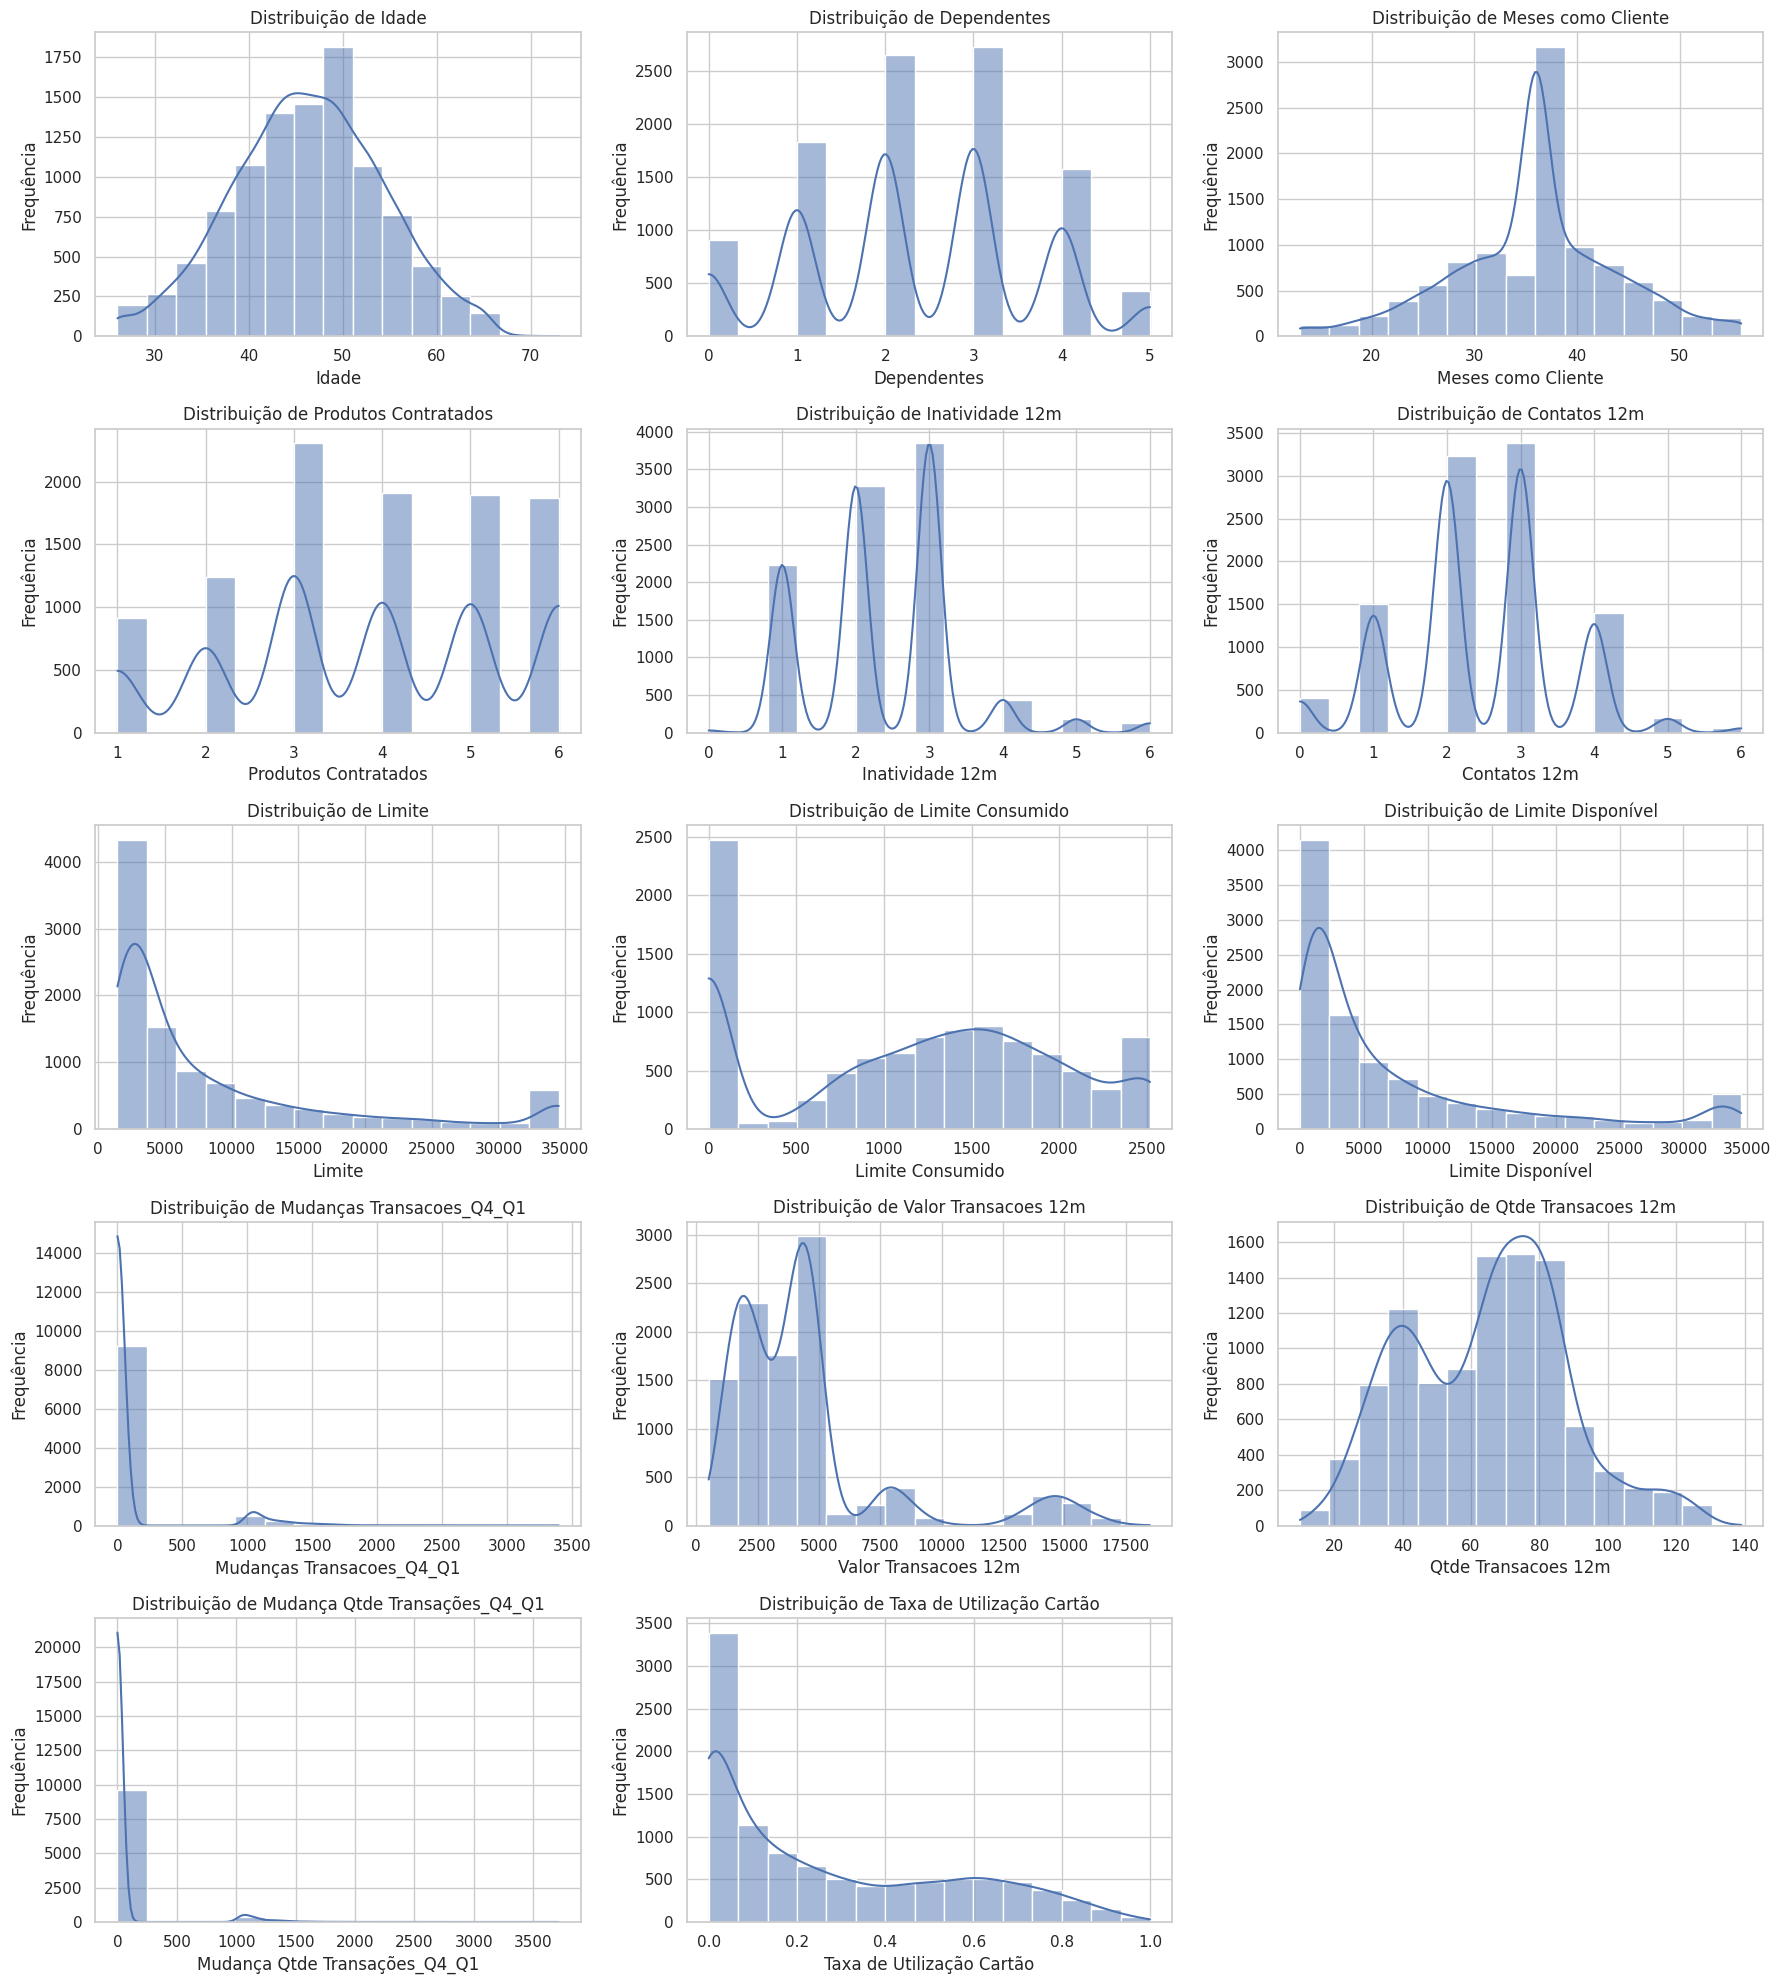

In [22]:
# Estilo dos gráficos
sns.set(style="whitegrid")

# Número de variáveis
n = len(num_vars)

# Definindo 3 colunas e calculando o número de linhas necessárias
cols = 3
rows = math.ceil(n / cols)

# Tamanho da figura ajustado
plt.figure(figsize=(6 * cols, 4 * rows))

# Gerando os subplots
for i, var in enumerate(num_vars):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[var], kde=True, bins=15)
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


#### 📈 1.3.4 – Boxplots das Variáveis Numéricas

Gráficos boxplot para análise de dispersão e detecção de outliers.  
Facilitam a visualização da mediana, amplitude e valores extremos.

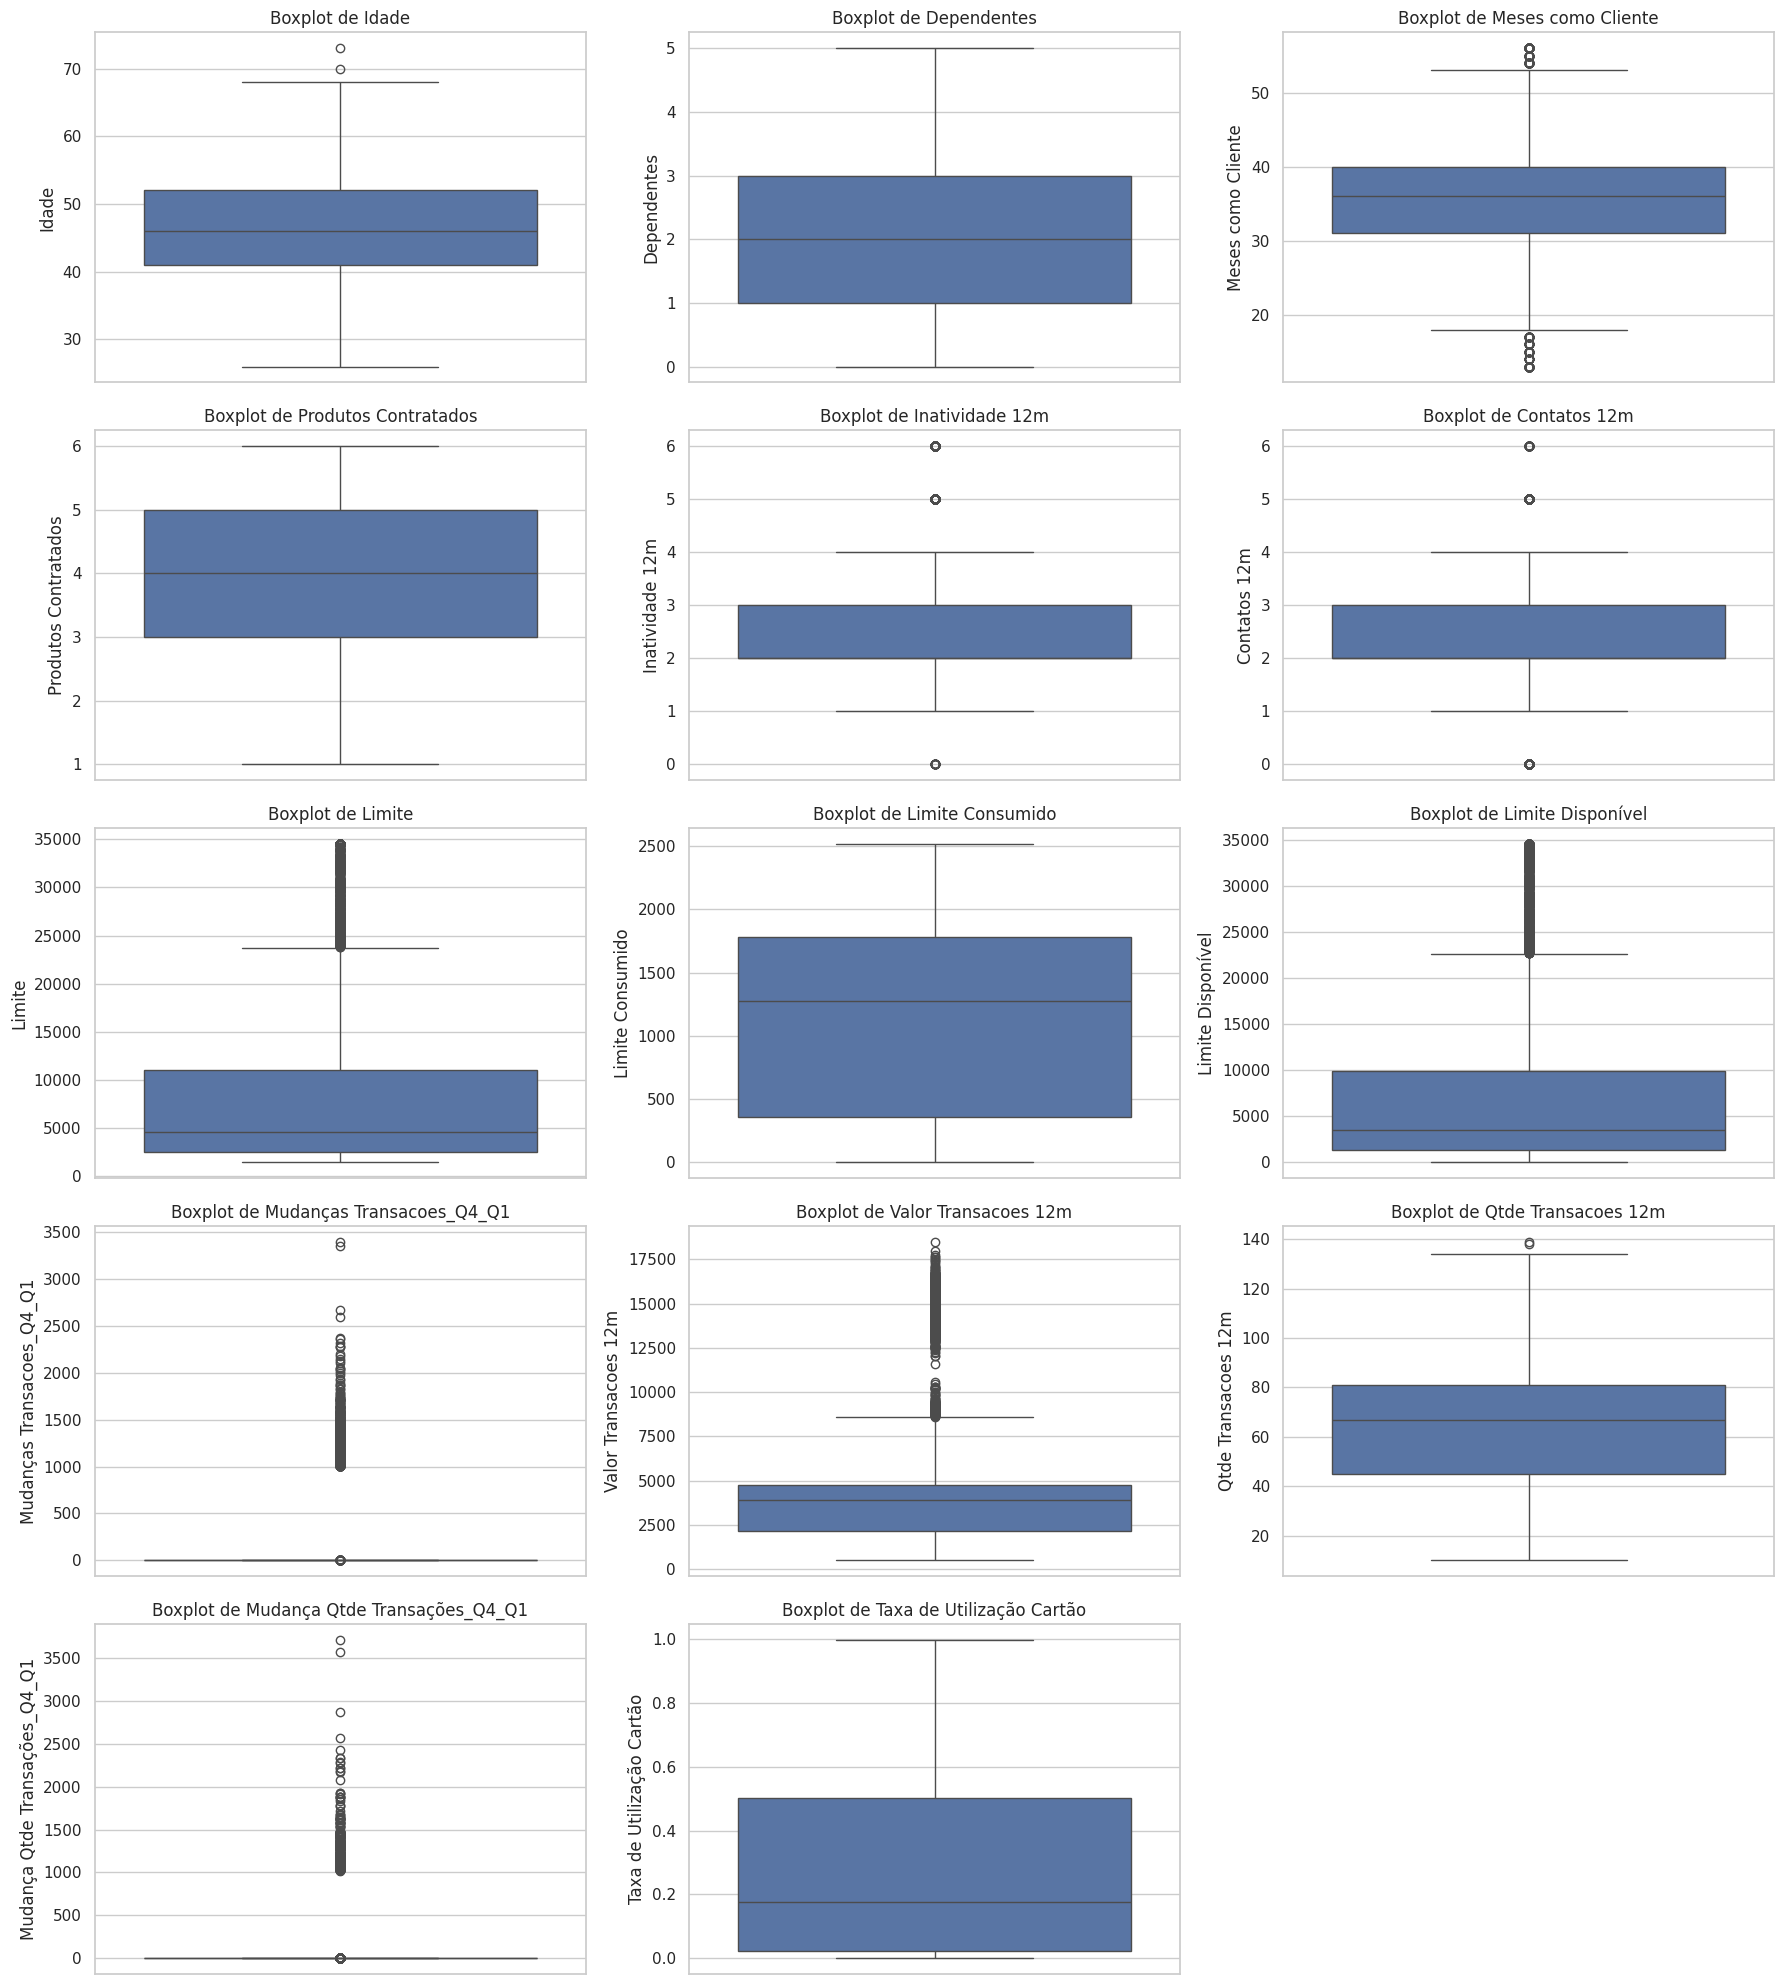

In [23]:
# Estilo dos gráficos
sns.set(style="whitegrid")

# Número de variáveis
n = len(num_vars)

# Definindo 3 colunas e calculando o número de linhas necessárias
cols = 3
rows = math.ceil(n / cols)

# Tamanho da figura ajustado
plt.figure(figsize=(6 * cols, 4 * rows))

# Gerando os subplots
for i, var in enumerate(num_vars):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(data=df, y=var)
    plt.title(f'Boxplot de {var}')
    plt.ylabel(var)

plt.tight_layout()
plt.show()


### 1.4 – Comparação Entre Grupos: Clientes Ativos vs Cancelados

Nesta etapa, exploramos a relação entre variáveis numéricas e a variável categórica **Categoria** (clientes ativos ou cancelados).  
Os boxplots permitem comparar a distribuição dos grupos, identificando padrões, assimetrias ou possíveis fatores associados ao churn.

---

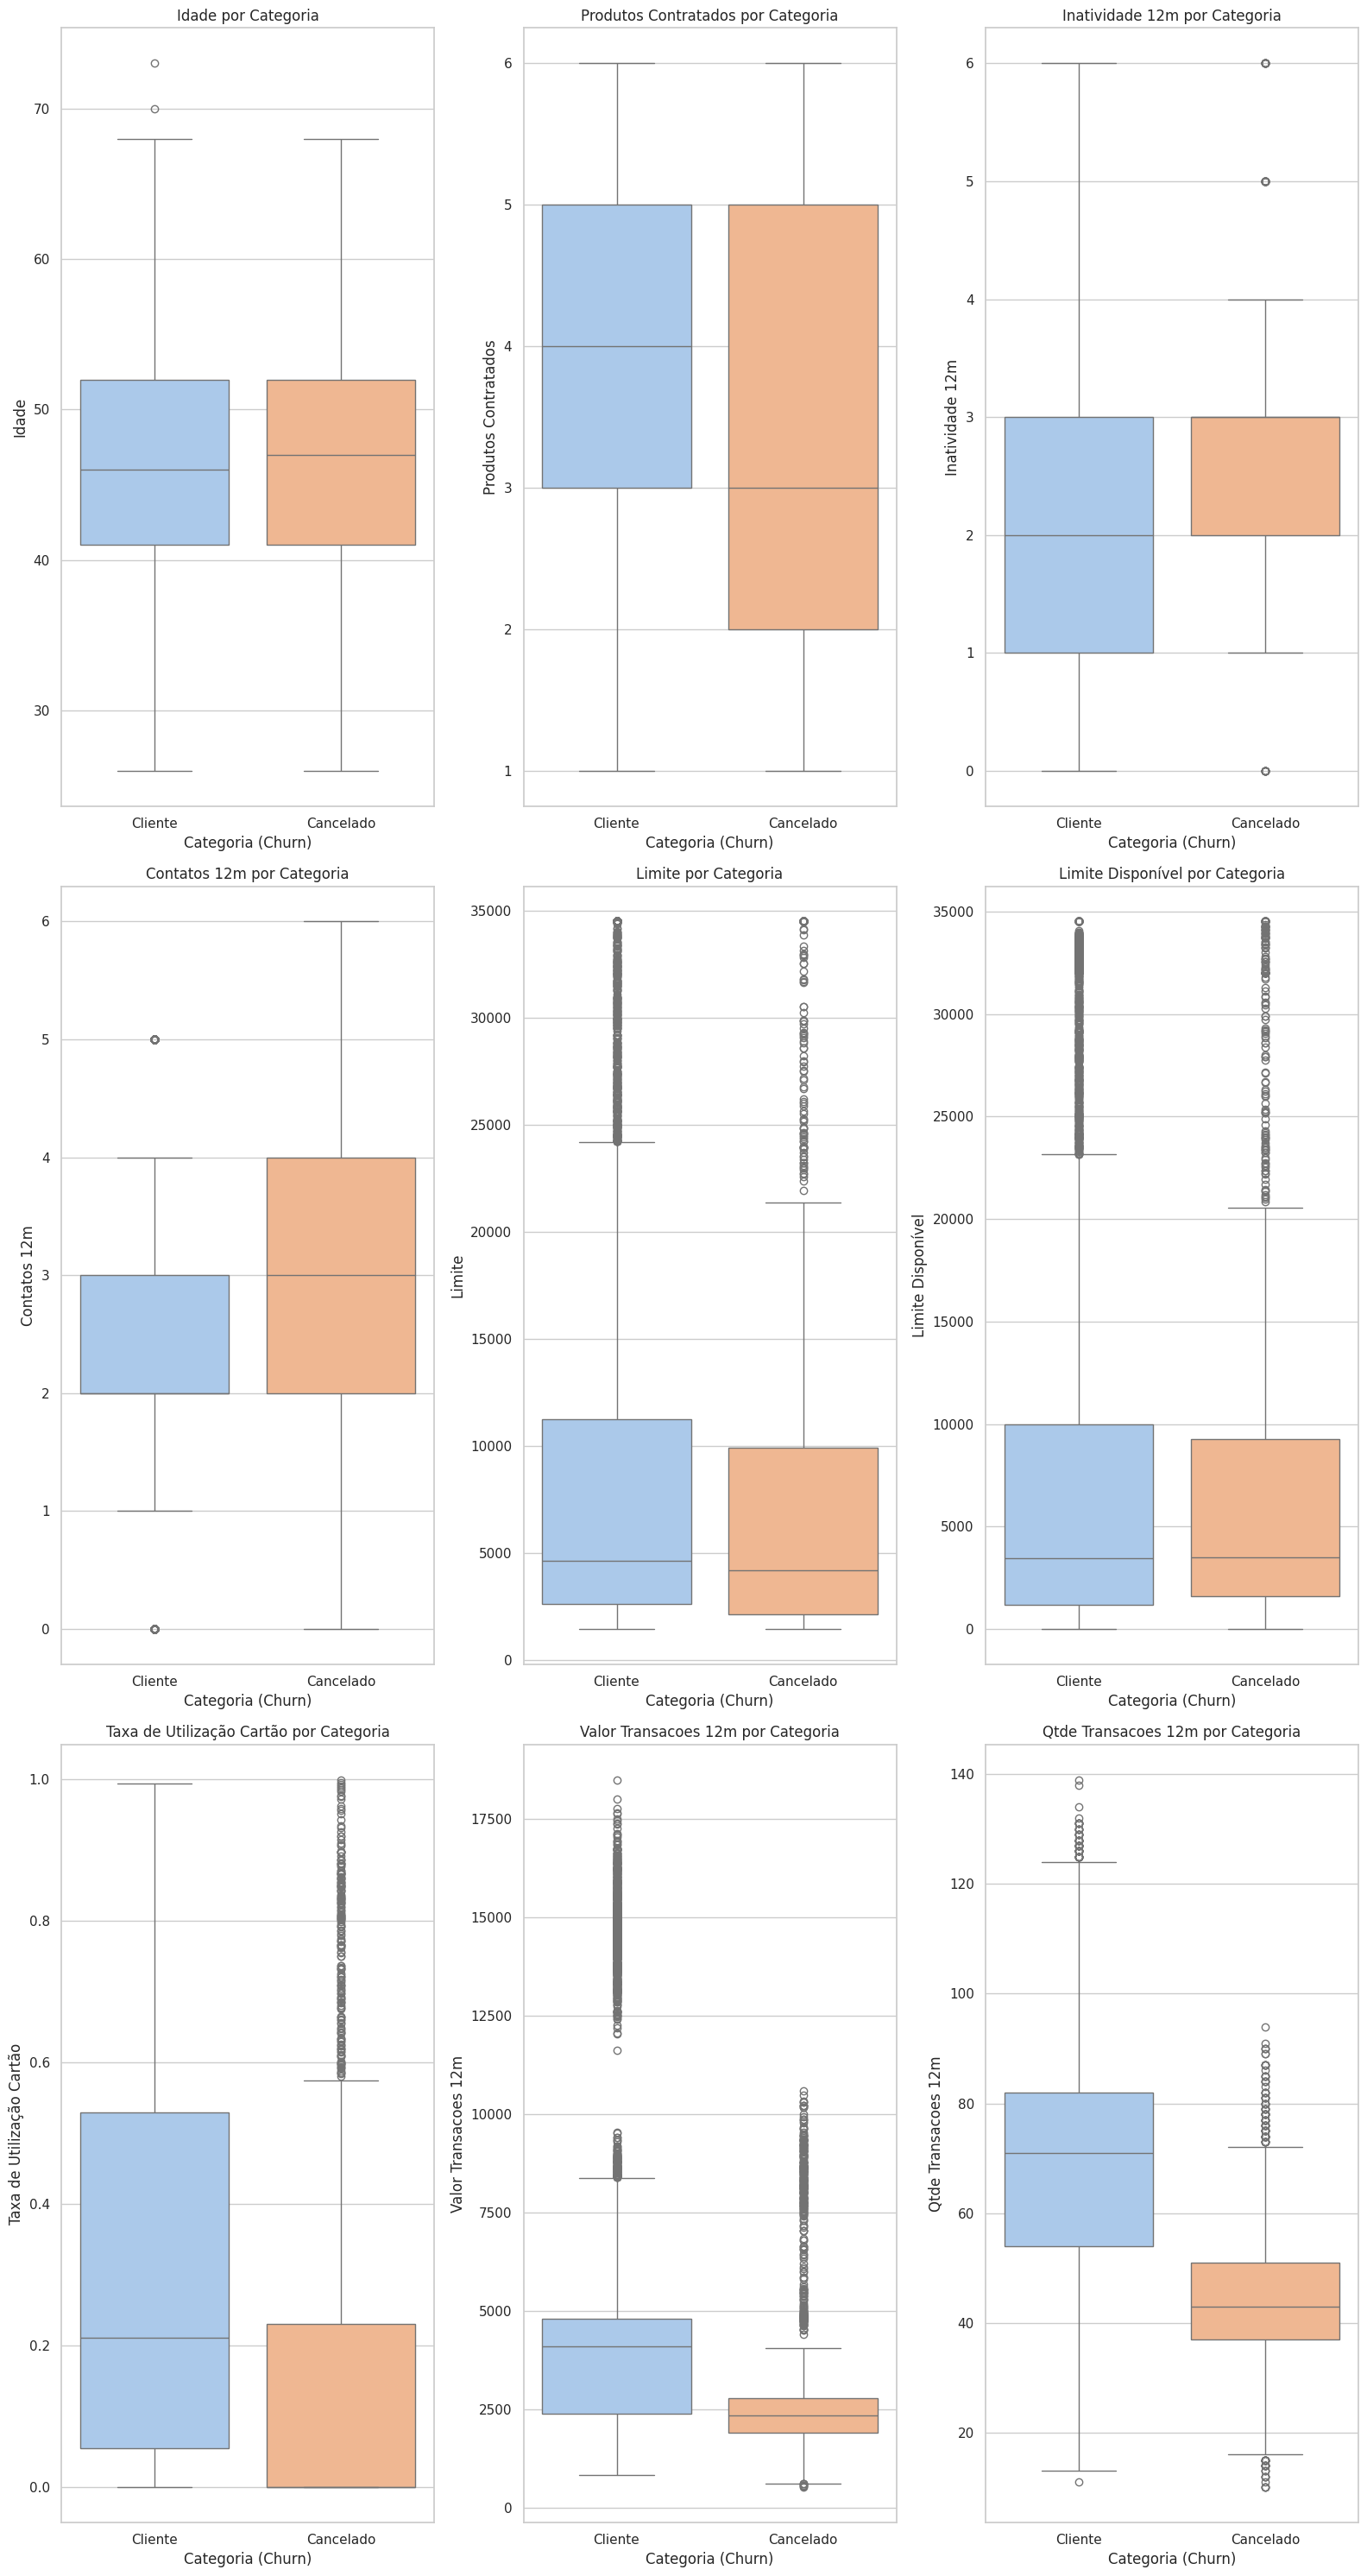

In [24]:
# Lista de variáveis numéricas selecionadas para análise cruzada
variaveis_cruzadas = [
    'Idade',
    'Produtos Contratados',
    'Inatividade 12m',
    'Contatos 12m',
    'Limite',
    'Limite Disponível',
    'Taxa de Utilização Cartão',
    'Valor Transacoes 12m',
    'Qtde Transacoes 12m'
]

# Tamanho da figura
plt.figure(figsize=(16, 30))

# Loop para gerar os boxplots
for i, var in enumerate(variaveis_cruzadas, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='Categoria', y=var, hue='Categoria', palette='pastel', dodge=False)
    plt.title(f'{var} por Categoria')
    plt.xlabel('Categoria (Churn)')
    plt.ylabel(var)

plt.tight_layout()
plt.show()


### ✅ Encerramento da Etapa 1 – Principais Insights Exploratórios

Análise comparativa entre clientes **ativos** e **cancelados** revelou padrões relevantes:

- **Produtos contratados:** cancelados tendem a ter **menos vínculos** (mediana: 3 vs. 4), sugerindo menor fidelização.
- **Contatos com o serviço:** cancelados acionam mais o atendimento (mediana: 3 vs. 2), indicando possíveis sinais de insatisfação.
- **Uso do cartão:** baixa taxa de utilização é comum entre cancelados (Q1 ≈ 0), podendo sinalizar **desengajamento progressivo**.


---

## Etapa 2 – Inferência Estatística Aplicada

Aplicação de testes de hipótese para avaliar se as diferenças observadas entre **clientes ativos** e **cancelados** nas variáveis mais relevantes da Etapa 1 são **estatisticamente significativas**.

Nesta etapa, serão testadas:

1. **Quantidade de Produtos Contratados**
2. **Contatos nos Últimos 12 Meses**
3. **Taxa de Utilização do Cartão**

Cada bloco a seguir traz:
- formulação da hipótese nula (H₀) e alternativa (H₁);
- escolha e execução do teste estatístico apropriado;
- interpretação prática do resultado.

> 📌 Testes utilizados: `t de Student` ou `Mann-Whitney U`, conforme o perfil da variável.

---

### 🧪 2.1. Teste de Hipótese – Produtos Contratados

#### ✅ 2.1.1. Formulação da Hipótese

- **H₀ (Hipótese Nula):** As médias de produtos contratados são iguais entre clientes ativos e cancelados.  
- **H₁ (Hipótese Alternativa):** As médias de produtos contratados são diferentes entre clientes ativos e cancelados.

#### 🔬 2.1.2. Escolha do Teste Estatístico

Com base na análise exploratória e no boxplot, observamos uma leve assimetria na distribuição.  
No entanto, como o tamanho das amostras é grande (N > 30 para ambos os grupos), o **Teste t para duas amostras independentes** é apropriado, com base no **Teorema Central do Limite**.

---

> 💡 **Insight:** Clientes que **cancelaram** tendem a ter **menos produtos contratados** em comparação aos clientes ativos.  
> Isso pode indicar um **menor nível de engajamento** ou **baixa fidelização** com a instituição — um possível sinal precoce de churn.

In [25]:
# Separar os dados em dois grupos
ativos = df[df['Categoria'] == 'Cliente']['Produtos Contratados']
cancelados = df[df['Categoria'] == 'Cancelado']['Produtos Contratados']

# Aplicar o teste t de duas amostras independentes (assumindo variâncias diferentes)
t_stat, p_val = ttest_ind(ativos, cancelados, equal_var=False)

# Exibir o resultado
print("🎯 Teste t para Produtos Contratados")
print(f"Estatística t: {t_stat:.4f}")
print(f"Valor p: {p_val:.4f}")

if p_val < 0.05:
    print("🔍 Resultado: Diferença estatisticamente significativa → rejeita-se H₀")
else:
    print("🔍 Resultado: Diferença não significativa → não se rejeita H₀")

🎯 Teste t para Produtos Contratados
Estatística t: 14.9445
Valor p: 0.0000
🔍 Resultado: Diferença estatisticamente significativa → rejeita-se H₀


### 🧪 2.2. Teste de Hipótese – Contatos nos Últimos 12 Meses

#### ✅ 2.2.1. Formulação da Hipótese

- **H₀ (Hipótese Nula):** A média de contatos é igual entre clientes ativos e cancelados.  
- **H₁ (Hipótese Alternativa):** A média de contatos é diferente entre os dois grupos.

#### 🔬 2.2.2. Escolha do Teste Estatístico

Assim como no teste anterior, utilizamos o **Teste t para duas amostras independentes**, com variâncias diferentes (`equal_var=False`), pois:

- A amostra é grande (mais de 30 observações por grupo);  
- A variável apresenta **assimetria moderada**, mas o **Teorema Central do Limite** garante a robustez do teste mesmo assim.

---


In [26]:
# Separar os dados por grupo
ativos = df[df['Categoria'] == 'Cliente']['Contatos 12m']
cancelados = df[df['Categoria'] == 'Cancelado']['Contatos 12m']

# Teste t
t_stat, p_val = ttest_ind(ativos, cancelados, equal_var=False)

# Resultado
print("🎯 Teste t para Contatos nos Últimos 12 Meses")
print(f"Estatística t: {t_stat:.4f}")
print(f"Valor p: {p_val:.4f}")

if p_val < 0.05:
    print("🔍 Resultado: Diferença estatisticamente significativa → rejeita-se H₀")
else:
    print("🔍 Resultado: Diferença não significativa → não se rejeita H₀")

🎯 Teste t para Contatos nos Últimos 12 Meses
Estatística t: -20.9014
Valor p: 0.0000
🔍 Resultado: Diferença estatisticamente significativa → rejeita-se H₀


> 💡 **Insight:** Clientes cancelados entraram mais em contato com a empresa, o que pode indicar insatisfação crescente ou tentativas prévias de resolução antes do churn.

### 🧪 2.3. Teste de Hipótese – Taxa de Utilização do Cartão

#### ✅ 2.3.1. Formulação da Hipótese

- **H₀ (Hipótese Nula):** A média da taxa de utilização do cartão é igual entre os grupos.  
- **H₁ (Hipótese Alternativa):** A média da taxa de utilização do cartão é diferente entre clientes ativos e cancelados.

#### 🔬 .2.3.2. Justificativa do Teste

- A variável é **contínua**.  
- As distribuições apresentam **assimetria**, mas como o tamanho das amostras é grande, o **Teorema Central do Limite** permite o uso do teste t.  
- Portanto, aplicamos o **teste t de duas amostras independentes**, sem assumir variâncias iguais (`equal_var=False`).

---

In [27]:
# Separar os dados
ativos = df[df['Categoria'] == 'Cliente']['Taxa de Utilização Cartão']
cancelados = df[df['Categoria'] == 'Cancelado']['Taxa de Utilização Cartão']

# Teste t
t_stat, p_val = ttest_ind(ativos, cancelados, equal_var=False)

# Resultado
print("🎯 Teste t para Taxa de Utilização do Cartão")
print(f"Estatística t: {t_stat:.4f}")
print(f"Valor p: {p_val:.4f}")

if p_val < 0.05:
    print("🔍 Resultado: Diferença estatisticamente significativa → rejeita-se H₀")
else:
    print("🔍 Resultado: Diferença não significativa → não se rejeita H₀")

🎯 Teste t para Taxa de Utilização do Cartão
Estatística t: 18.6228
Valor p: 0.0000
🔍 Resultado: Diferença estatisticamente significativa → rejeita-se H₀


> 💡 **Insight:** Clientes que **cancelaram** apresentaram, em média, uma **taxa de utilização do cartão significativamente menor** que os clientes ativos.  
> Isso pode indicar **baixo engajamento com o serviço**, sendo um possível **sinal precoce de desinteresse ou abandono**.

### ✅ Encerramento da Etapa 2 – Inferência Estatística Aplicada

Com base na análise descritiva e nos padrões observados nos gráficos, três variáveis numéricas foram selecionadas para teste de hipótese com o objetivo de investigar se há diferenças estatisticamente significativas entre os grupos de clientes **ativos** e **cancelados**:

- **Produtos Contratados**
- **Contatos nos Últimos 12 Meses**
- **Taxa de Utilização do Cartão**

Foi aplicado o **teste t de duas amostras independentes** (assumindo variâncias desiguais). Os resultados foram os seguintes:

| Variável                      | Estatística t | Valor p   | Conclusão                       |
|------------------------------|---------------|-----------|---------------------------------|
| Produtos Contratados         | 14.9445       | < 0.0001  | Diferença significativa         |
| Contatos nos Últimos 12 Meses| -20.9014      | < 0.0001  | Diferença significativa         |
| Taxa de Utilização do Cartão | 18.6228       | < 0.0001  | Diferença significativa         |

---

✅ **Conclusão técnica:**  
Para as três variáveis analisadas, os testes rejeitam a hipótese nula (H₀) ao nível de significância de 5%, indicando que existe **diferença estatística significativa** entre clientes ativos e cancelados.  
Esses resultados reforçam os achados da análise exploratória e validam a inclusão dessas variáveis como potenciais **indicadores preditivos de churn** em etapas posteriores do projeto.

> 🔍 **Próximo passo:** consolidar esses insights em um direcionamento prático voltado à **estratégia de retenção de clientes**.


### 🧠 Interpretação Prática – Conexão com o Negócio

Com base nos testes de hipótese e nos resultados estatisticamente significativos, é possível derivar interpretações práticas voltadas à **retenção de clientes** e ao combate ao churn:

#### Produtos Contratados
- **Clientes com menos produtos contratados têm maior chance de cancelar.**
- A baixa diversificação de serviços indica menor engajamento com a instituição.
- 💡 **Ação recomendada:** desenvolver campanhas de **upsell** e **cross-sell** direcionadas a clientes com apenas 1 ou 2 produtos contratados, incentivando a adesão a pacotes combinados.

#### Contatos nos Últimos 12 Meses
- **Clientes que cancelam tendem a entrar mais em contato com a empresa.**
- Pode refletir insatisfação recorrente ou tentativas frustradas de resolução.
- 💡 **Ação recomendada:** implementar alertas automáticos no CRM para clientes com **aumento anormal no volume de contato**, priorizando atendimento e oferta de soluções antes do churn.

#### Taxa de Utilização do Cartão
- **Canceladores usam menos o cartão ao longo do tempo.**
- Pode indicar **desengajamento progressivo** ou substituição por produtos de concorrentes.
- 💡 **Ação recomendada:** campanhas de **reativação personalizada**, bonificações de uso e aumento temporário de limite para clientes com baixa taxa de utilização.

---

🎯 **Resumo estratégico:**  
Essas variáveis demonstraram **diferença estatística significativa** entre os grupos e representam **pontos viáveis de intervenção no ciclo de vida do cliente**. A análise estatística aplicada, aliada à compreensão do negócio, já fornece **insumos concretos para estratégias de retenção orientadas por dados.**

## 🧾 Versões dos Pacotes Utilizados

Este notebook foi executado com as seguintes versões de bibliotecas Python:

In [28]:
# 📦 Versões dos pacotes usados neste Lab
%reload_ext watermark
%watermark -a "Small Data Lab" --python --iversions

Author: Small Data Lab

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.37.0

scipy     : 1.15.3
matplotlib: 3.10.3
seaborn   : 0.13.2
numpy     : 2.2.6
pandas    : 2.3.0

